This notebook contain:

 01 - Starting new notebook, establishing path and importing a dataframe
 
 02-  Basic statistics from Family situation profile
 
 03 - Checking customers expenditure depending on profile group
 
 04 - Checking customers frequency depending on profile group
 
 05 - Comparing profiles per region
 
 06 - Comparing customers' profiles - Visualisations
 
-> Piechart: Total customers per region

-> Families per region (horizontal bar chart)

-> Income situation per region (horizontal bar chart)

-> Families per department (horizontal bar chart) 

-> Bar charts for dependants and age groups (two chart: one horizontal and one vertical)

-> Scatterplots (two) => checking relations between civil status and number of dependants

-> Family buying habits (horizontal bar chart) - day of the week

-> Family buying habits (horizontal bar chart) - hour of day
 
 
 

01. Starting new notebook, importing dataframe and establishing path

In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Establishing a path to import data frames
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\August-2023 Instacart Basket Analysis'

In [3]:
# Importing 'subfinal.pkl' data set
subfinal = pd.read_pickle(os.path.join(path, '2-Data', 'Prepared Data', 'subfinal.pkl'))

In [6]:
subfinal.shape

(9297268, 38)

In [7]:
subfinal.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest days',
       'Busiest hours', 'max_order', 'loyalty_flag', 'avg_prices',
       'spending_flag', 'median_prior_order', 'frequency_flag', 'gender',
       'state', 'age', 'dependants', 'civil_status', 'income', 'region',
       'exclusion_flag', 'department', 'age_group', 'dependants_category',
       'income_group', 'family_situation', 'income_situation',
       'busiest_period_week', 'busiest_period_day'],
      dtype='object')

02. Basic statistics from Family situation profile

In [6]:
# Find out basic statistics => family profile
subfinal.groupby('family_situation').agg({'income': ['mean', 'median', 'min', 'max']})

income                         
                           mean    median    min     max
family_situation                                        
Older parent      114811.785501  115212.0  26154  593901
Single Man         99900.040316   97035.0  25903  578251
Single Woman       99899.554201   96918.0  25979  584097
Single parent      70879.077802   69977.0  25937  396364
Younger parent     70669.499343   69111.0  25911  397929

In [7]:
# Find out basic statistics => income profile
subfinal.groupby('income_situation').agg({'income': ['mean', 'median', 'min', 'max']})

income                          
                                       mean    median     min     max
income_situation                                                     
Higher income older parent    135522.376255  131946.0  100001  593901
Higher income single Man      136072.087618  131710.0  100011  578251
Higher income single parent   136001.542295  101262.0  100006  396364
Higher income single woman    135862.815560  132052.0  100001  584097
Higher income younger parent  140558.178917  101275.0  100000  397929
Low income older parent        39924.662604   40036.0   26154   49998
Low income single Man          40014.869990   41051.0   25903   49991
Low income single parent       39811.781891   41604.0   25937   49981
Low income single woman        39638.235114   39912.0   25979   49992
Low income younger parent      39680.130191   41050.0   25911   49998
Mid income older parent        81490.094199   85730.0   50001   99999
Mid income single Man          76300.042868   75081.0   50002   99997
Mid income single parent       73981.904942   72886.0   50044   99999
Mid income single woman        76764.354487   76441.0   50006   99996
Mid income younger parent      73750.894018   72322.0   50002   99999

There are clear 'outliers' in the higher income groups. Probably due to some customers having very high salaries. This is worth investigating, so they could be targeted specificallly during a marketing campaign.

03 - Checking customers expenditure depending on profile group

In [8]:
# Addressing the outlier in the 'price column'
subfinal.loc[subfinal['prices'] >100, 'prices'] = np.nan

In [9]:
# Find out basic statistics => family profile
subfinal.groupby('family_situation').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
                      mean median  min   max
family_situation                            
Older parent      7.793552    7.4  1.0  25.0
Single Man        7.786278    7.4  1.0  25.0
Single Woman      7.798230    7.4  1.0  25.0
Single parent     7.802163    7.4  1.0  25.0
Younger parent    7.785656    7.4  1.0  25.0

In [10]:
# Find out basic statistics => income profile
subfinal.groupby('income_situation').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
                                  mean median  min   max
income_situation                                        
Higher income older parent    7.955718   7.70  1.0  25.0
Higher income single Man      7.945908   7.60  1.0  25.0
Higher income single parent   7.925269   7.65  1.0  25.0
Higher income single woman    7.959869   7.70  1.0  25.0
Higher income younger parent  7.854103   7.50  1.0  25.0
Low income older parent       6.529612   5.80  1.0  25.0
Low income single Man         6.732889   6.10  1.0  25.0
Low income single parent      6.904568   6.30  1.0  25.0
Low income single woman       6.701984   6.10  1.0  25.0
Low income younger parent     6.892945   6.30  1.0  25.0
Mid income older parent       7.778890   7.30  1.0  25.0
Mid income single Man         7.887346   7.50  1.0  25.0
Mid income single parent      7.961244   7.70  1.0  25.0
Mid income single woman       7.901884   7.50  1.0  25.0
Mid income younger parent     7.951344   7.60  1.0  25.0

In the first comparison (family profile) both mean and median are similar throoghout all groups. However, when profiling clients  through income, it becomes clear that both mean and median go up the higher that class' income is, which means that on average they are expected (and actually do) spend more money than lower income classes. 

04 - Checking customers frequency depending on profile group

In [11]:
# Find out basic statistics.
subfinal.groupby('family_situation').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                                   mean median  min   max
family_situation                                         
Older parent                  10.632126    7.0  0.0  30.0
Single Man                    10.613556    7.0  0.0  30.0
Single Woman                  10.560519    7.0  0.0  30.0
Single parent                 10.555444    7.0  0.0  30.0
Younger parent                10.591113    7.0  0.0  30.0

In [12]:
# Find out basic statistics.
subfinal.groupby('income_situation').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                                               mean median  min   max
income_situation                                                     
Higher income older parent                10.602999    7.0  0.0  30.0
Higher income single Man                  10.535428    7.0  0.0  30.0
Higher income single parent               10.446792    7.0  0.0  30.0
Higher income single woman                10.437305    7.0  0.0  30.0
Higher income younger parent              10.701118    7.0  0.0  30.0
Low income older parent                   10.919251    7.0  0.0  30.0
Low income single Man                     10.858091    7.0  0.0  30.0
Low income single parent                  11.137316    7.0  0.0  30.0
Low income single woman                   10.907397    7.0  0.0  30.0
Low income younger parent                 10.935905    7.0  0.0  30.0
Mid income older parent                   10.612915    7.0  0.0  30.0
Mid income single Man                     10.634580    7.0  0.0  30.0
Mid income single parent                  10.453449    7.0  0.0  30.0
Mid income single woman                   10.604461    7.0  0.0  30.0
Mid income younger parent                 10.521725    7.0  0.0  30.0

On average, in both comparisons all groups have a mean of around 10.5 days between orders. It is not surpisong though that this is the result, since it was stated in a previous report that frequent customers represent 70% of all Instacart customers.

05 Comparing family profiles per region

In [13]:
# Checking figures by family profile
subfinal.groupby(['family_situation', 'region']).size().unstack(fill_value=0)

region,Midwest,Northeast,South,West
family_situation,,,,
Older parent,1071912,812789,1508969,1174606
Single Man,275366,207104,380576,302396
Single Woman,271673,199368,394762,293456
Single parent,105562,76915,152201,110530
Younger parent,455201,343568,659219,501095


In [14]:
crosstab = pd.crosstab(subfinal['family_situation'], subfinal['region'], dropna = False)

In [15]:
crosstab.to_clipboard()


While the population size differs, its proportion is almost identical accrosss all regions: Older parents at 49%, Single men and single women at 12.5% each, Single parents at 5%, and finally Younger parents at 21%. This may mean that we could expect a similar behaviour from customers accross all regions.

In [16]:
# Checking figures by income profile
subfinal.groupby(['income_situation', 'region']).size().unstack(fill_value=0)

region,Midwest,Northeast,South,West
income_situation,,,,
Higher income older parent,747586,559004,1017342,791280
Higher income single Man,128750,93726,172579,143615
Higher income single parent,3681,1537,5677,3492
Higher income single woman,124849,90537,182506,135008
Higher income younger parent,15519,10291,22054,15221
Low income older parent,86359,69124,130588,101254
Low income single Man,30558,23457,42110,33211
Low income single parent,14747,10378,23336,18079
Low income single woman,27760,22965,44826,30341


In [17]:
crosstab = pd.crosstab(subfinal['income_situation'], subfinal['region'], dropna = False)

In [18]:
crosstab.to_clipboard()

Accross all regions, the proportion of Higher income customers is around 46%. The Mid earners group comprises 43% of customers, and low earners are at 11%.
It seems that Instacart could expect all regions to behave in a similar way, with the difference in revenue depending mainly on the size of the population.

06. Comparing customers' profiles - Visualisations

Visualisation 1 - Pie chart (total customers per region)

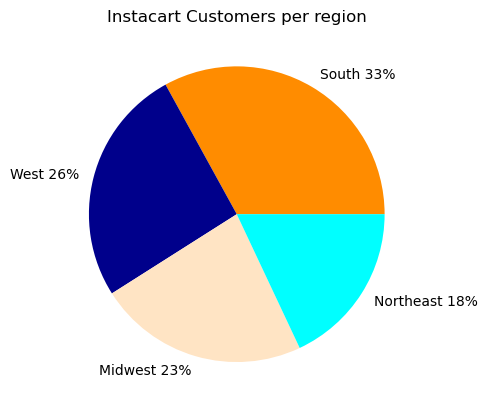

In [4]:
y = np.array([33, 26, 23, 18])
mylabels = ["South 33%", "West 26%", "Midwest 23%", "Northeast 18%"]
mycolors = ['darkorange', 'darkblue', 'bisque', 'cyan']
plt.title('Instacart Customers per region')
plt.pie(y, labels = mylabels, colors = mycolors)
plt.savefig('pie_cust_regions.png')
plt.show() 

Image saved by right click and saved to file

Visualisation 2 => family profiles per region

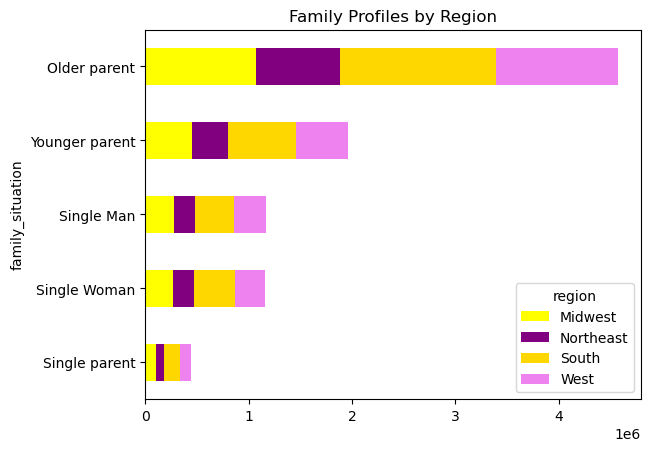

In [5]:
# Proportion of family profiles per region
# Group customer profile and regions

family_region = subfinal.groupby(['family_situation', 'region']).size().unstack()

# Sort

family_region = family_region.loc[family_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

family_region_bar = family_region.plot.barh(stacked = True, title = 'Family Profiles by Region', color = ['yellow','purple','gold', 'violet'])

In [6]:
# Exporting and saving it to Folder
family_region_bar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'bar_family_region.png'))

Visualisation 3 => income profile per region

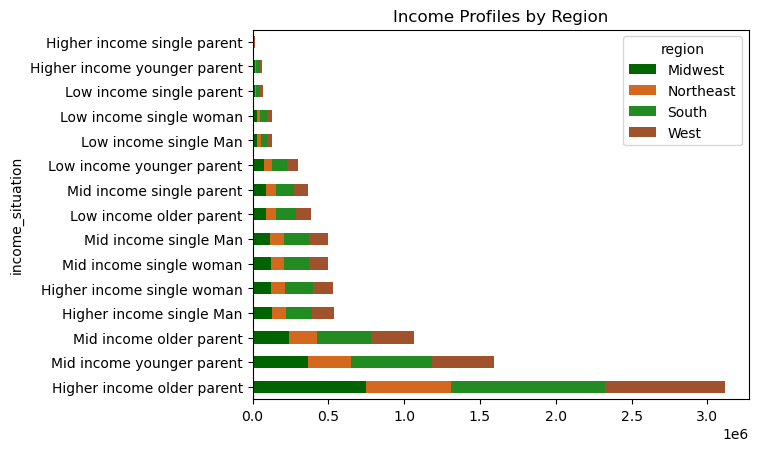

In [8]:
# Proportion of family profiles per region
# Group customer profile and regions

income_region = subfinal.groupby(['income_situation', 'region']).size().unstack()

# Sort

income_region = income_region.loc[income_region.sum(axis=1).sort_values(ascending=False).index]

# Create bar chart

income_region_bar = income_region.plot.barh(stacked = True, title = 'Income Profiles by Region', color = ['darkgreen','chocolate','forestgreen', 'sienna'])

In [9]:
# Exporting and saving it to Folder
income_region_bar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'bar_income_region.png'))

Visualisation 4 => family buying habits per department

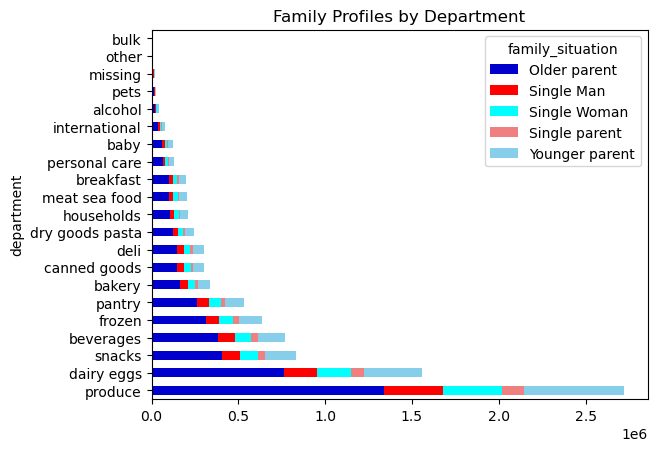

In [10]:
# Group family profile and departments

familydep = subfinal.groupby(['department', 'family_situation']).size().unstack()

# Sort

familydep = familydep.loc[familydep.sum(axis=1).sort_values(ascending=False).index]

# Create bar chart

familydepbar = familydep.plot.barh(stacked = True, title = 'Family Profiles by Department', color = ['mediumblue','red', 'cyan','lightcoral', 'skyblue'])

In [11]:
# Exporting and saving it to Folder
familydepbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Family profile per department.png'))

Older parents seem to buy more than othen categories. This seems logical not only because they are the larger population, but probably because they may have more dependants. The second category would be Younger parents. Single men and women appear to have similar buying habits. What is surprising is that single parents appear to buy less than single adults, which is worth investigating.

Visualusation 5 - Looking into dependants

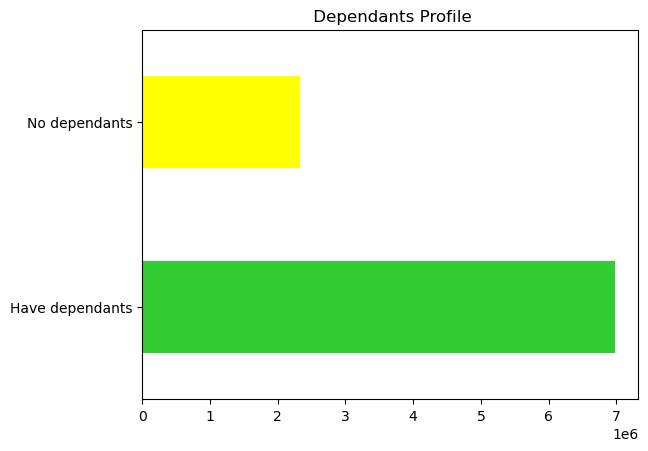

In [12]:
# Checking dependants category
dependantsbar = subfinal['dependants_category'].value_counts().plot.barh(color = ['limegreen', 'yellow'], title = ' Dependants Profile')

In [19]:
subfinal['dependants_category'].value_counts(dropna=False)

Have dependants    6972567
No dependants      2324701
Name: dependants_category, dtype: int64

75% of Instacart customers have dependants, which is going to influence their buying habits. 

In [13]:
# Exporting and saving it to Folder
dependantsbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Dependant numbers in graphic.png'))

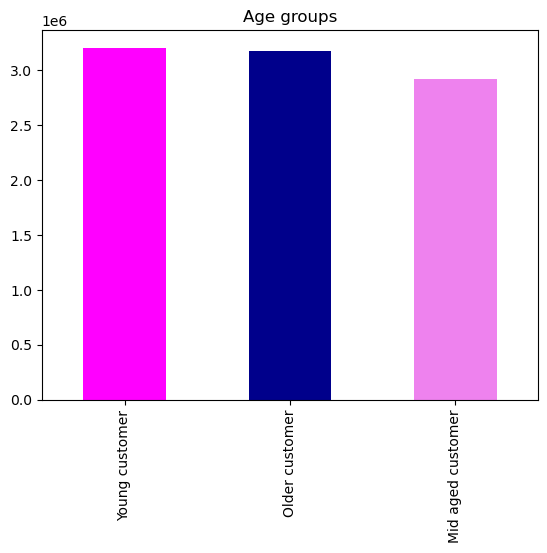

In [15]:
# Checking age category
agesbar = subfinal['age_group'].value_counts().plot.bar(color = ['magenta', 'darkblue', 'violet'], title = 'Age groups')

In [16]:
# Exporting and saving it to Folder
agesbar.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Age groups.png'))

From an age perspective, the Instacart customers' population is equally divided between Older and Younger customers, with a slight decrease in Mid age customers. This particular graphic does not help the analysis, since many of these individuals could have dependants, and be married or single/divorced/widowed. Therefore, looking into families (with or without income profile) gives us a clearer view.

Visualisation 6 => Checking dependants per civil status

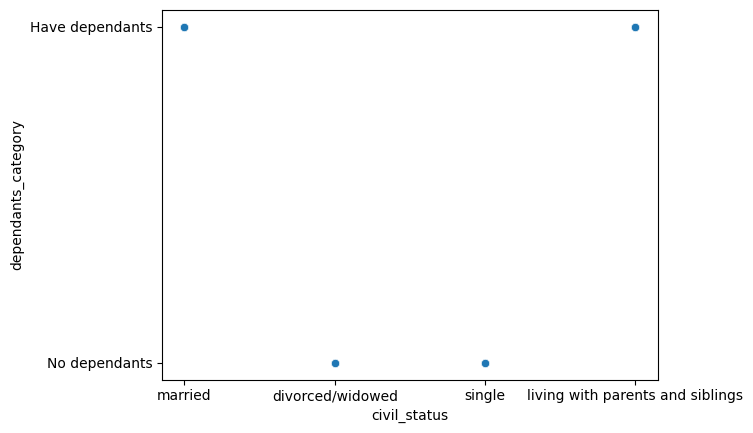

In [27]:
# Attempting a Scatterpolot => Dependants per civil status
scat = sns.scatterplot(x = 'civil_status', y = 'dependants_category',data = subfinal)

In [28]:
# Exporting and saving it to Folder
scat.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Dependants per civil status.png'))

The plot shows that married and 'living with parents and siblings' categories have dependants, while those single or divorced/widowed tend not to. While not conclusive, this may indicate that not all dependants may be just children or teenagers but also may be older parents or perhaps disabled individuals in care of their relatives. It is worth trying to get additional data to check this further.

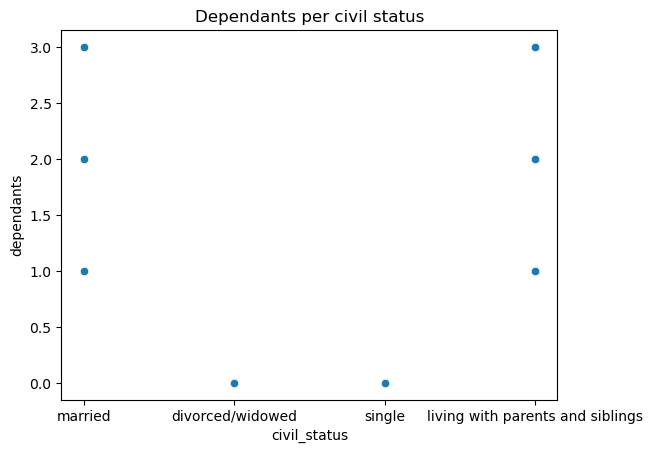

In [4]:
# Attempting a Scatterpolot => Dependants per civil status
scat2 = sns.scatterplot(x = 'civil_status', y = 'dependants',data = subfinal).set(title = 'Dependants per civil status')

In [ ]:
# Exporting and saving it to Folder
scat2.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Number of Dependants per civil status.png'))

This scatterplot confirms my previous comments regarding the number of dependants per civil status.

Visualisation 7 => family buying habits => days of the week

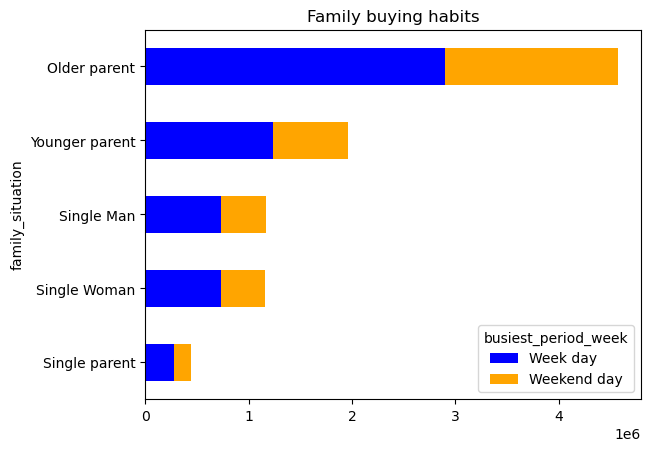

In [17]:
# Checking family buying habits => days

familybuy = subfinal.groupby(['family_situation', 'busiest_period_week']).size().unstack()

# Sort

familybuy = familybuy.loc[familybuy.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

familybuy = familybuy.plot.barh(stacked = True, title = 'Family buying habits', color = ['blue','orange'])

In [37]:
subfinal['busiest_period_week'].value_counts(dropna=False)

Week day       5898222
Weekend day    3399046
Name: busiest_period_week, dtype: int64

In one hand, previous data has shown us that the busiest days of the week are saturday and sunday, but the current graphic and data shows that around 65-70% of the shopping takes place during the week. However, this is not contradictory: considering that weekend is only 2 days (as compared to 5 week days). An average of 12.5%  of the shopping happens during each of the weekdays, as opposed to 18.2% during each of the weekend days.

In [18]:
# Exporting and saving it to Folder
familybuy.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Family buying habits.png'))

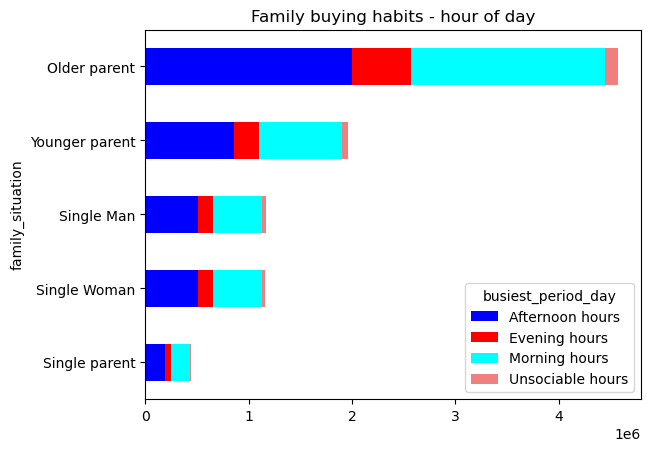

In [20]:
# Checking family buying habits => hours of the day 

familybuy2 = subfinal.groupby(['family_situation', 'busiest_period_day']).size().unstack()

# Sort

familybuy2 = familybuy2.loc[familybuy2.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

familybuy2 = familybuy2.plot.barh(stacked = True, title = 'Family buying habits - hour of day', color = ['blue','red','cyan', 'lightcoral'])

In [21]:
# Exporting and saving it to Folder
familybuy2.figure.savefig(os.path.join(path, '4-Analysis','Visualisations', 'Family buying habits - hour of day.png'))

This graphic confirms that most shopping happens during the morning and afternoon hours, as numeric data has shown.

Exporting subset to file

In [43]:
subfinal.to_pickle(os.path.join(path, '2-Data','Prepared Data', 'Subset-task410.pkl'))